In [1]:
import os
import numpy as np
import imageio
from sklearn.metrics import confusion_matrix, cohen_kappa_score
import matplotlib.pyplot as plt

In [2]:
def load_mask(path):
    """Load a mask image and binarize it."""
    mask = imageio.imread(path)
    mask = (mask > 0).astype(np.uint8)
    return mask

def compute_iou_dice(y_true, y_pred):
    """Compute IoU and Dice score for binary masks."""
    intersection = np.logical_and(y_true, y_pred).sum()
    union = np.logical_or(y_true, y_pred).sum()
    iou = intersection / union if union != 0 else 0.0

    dice = (2 * intersection) / (y_true.sum() + y_pred.sum()) if (y_true.sum() + y_pred.sum()) != 0 else 0.0

    return iou, dice

def evaluate_mask(pred_mask, gt_mask):
    """Compute accuracy, confusion matrix, Cohen's Kappa, IoU, and Dice score."""
    assert pred_mask.shape == gt_mask.shape, "Shapes must match!"

    y_true = gt_mask.flatten()
    y_pred = pred_mask.flatten()

    accuracy = np.mean(y_true == y_pred)
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    kappa = cohen_kappa_score(y_true, y_pred)

    iou, dice = compute_iou_dice(gt_mask, pred_mask)

    return accuracy, cm, kappa, iou, dice

def evaluate_all(predicted_mask_dirs, ground_truth_dir):
    """Evaluate multiple prediction directories and plot a comparison chart."""
    results = []

    for pred_dir in predicted_mask_dirs:
        print(f"\nEvaluating: {pred_dir}")
        mask_files = [f for f in os.listdir(pred_dir) if f.endswith('.png')]

        kappas = []
        ious = []
        dices = []

        for mask_file in mask_files:
            pred_mask_path = os.path.join(pred_dir, mask_file)
            gt_mask_path = os.path.join(ground_truth_dir, mask_file)

            if not os.path.exists(gt_mask_path):
                print(f"Ground truth for {mask_file} not found. Skipping.")
                continue

            pred_mask = load_mask(pred_mask_path)
            gt_mask = load_mask(gt_mask_path)

            _, _, kappa, iou, dice = evaluate_mask(pred_mask, gt_mask)

            kappas.append(kappa)
            ious.append(iou)
            dices.append(dice)

        if kappas:
            avg_kappa = np.mean(kappas)
            avg_iou = np.mean(ious)
            avg_dice = np.mean(dices)
            print(f"  Avg IoU:   {avg_iou:.4f}")
            print(f"  Avg Dice:  {avg_dice:.4f}")
            print(f"  Avg Kappa: {avg_kappa:.4f}")

            results.append({
                'name': os.path.basename(pred_dir.rstrip("/")),
                'iou': avg_iou,
                'dice': avg_dice,
                'kappa': avg_kappa
            })
        else:
            print(f"No valid masks evaluated for {pred_dir}.")

    # Plot
    if results:
        names = [r['name'] for r in results]
        ious = [r['iou'] for r in results]
        dices = [r['dice'] for r in results]
        kappas = [r['kappa'] for r in results]

        x = np.arange(len(names))
        width = 0.2

        fig, ax = plt.subplots(figsize=(10, 6))
        ax.bar(x - width, ious, width, label='IoU')
        ax.bar(x, dices, width, label='Dice')
        ax.bar(x + width, kappas, width, label='Kappa')

        ax.set_xlabel('Prediction Folder')
        ax.set_ylabel('Metric Score')
        ax.set_title('Segmentation Metric Comparison')
        ax.set_xticks(x)
        ax.set_xticklabels(names, rotation=30)
        ax.legend()

        plt.tight_layout()
        plt.show()


Evaluating: ../images/unet_pred


C:\Users\sj1205\AppData\Local\Temp\ipykernel_27124\3693921258.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = imageio.imread(path)
C:\Users\sj1205\AppData\Local\Temp\ipykernel_27124\3693921258.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = imageio.imread(path)
C:\Users\sj1205\AppData\Local\Temp\ipykernel_27124\3693921258.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread`

  Avg IoU:   0.6065
  Avg Dice:  0.7426
  Avg Kappa: 0.7363

Evaluating: ../images/unetpp_pred


C:\Users\sj1205\AppData\Local\Temp\ipykernel_27124\3693921258.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = imageio.imread(path)
C:\Users\sj1205\AppData\Local\Temp\ipykernel_27124\3693921258.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = imageio.imread(path)
C:\Users\sj1205\AppData\Local\Temp\ipykernel_27124\3693921258.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread`

  Avg IoU:   0.5121
  Avg Dice:  0.6597
  Avg Kappa: 0.6521

Evaluating: ../images/micro_sam_pred


C:\Users\sj1205\AppData\Local\Temp\ipykernel_27124\3693921258.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = imageio.imread(path)
C:\Users\sj1205\AppData\Local\Temp\ipykernel_27124\3693921258.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = imageio.imread(path)
C:\Users\sj1205\AppData\Local\Temp\ipykernel_27124\3693921258.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread`

  Avg IoU:   0.7287
  Avg Dice:  0.8396
  Avg Kappa: 0.8349


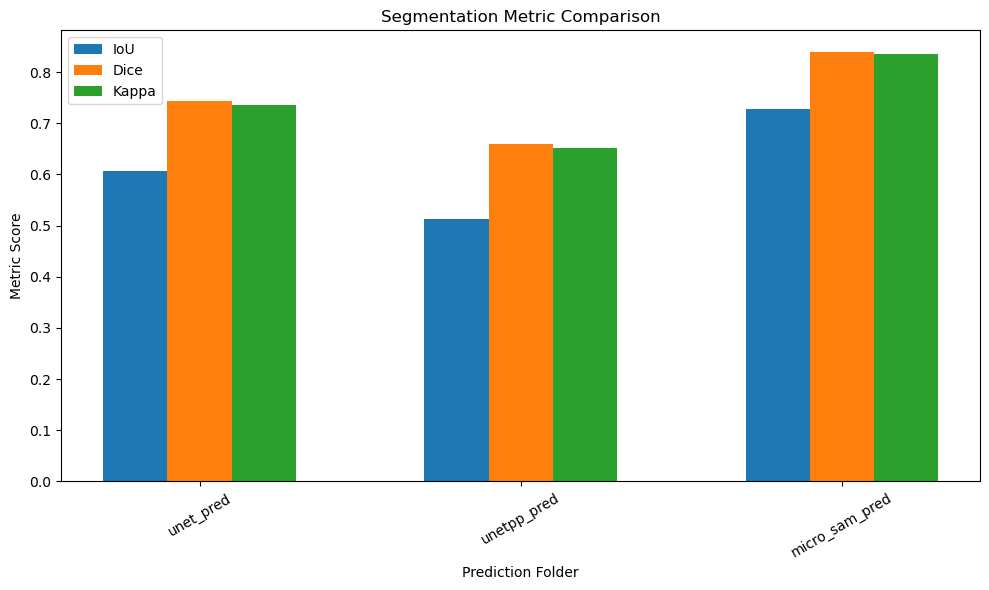

In [3]:

if __name__ == "__main__":
    predicted_mask_dirs = [
        "../images/unet_pred",
        "../images/unetpp_pred",
        "../images/micro_sam_pred"
    ]
    ground_truth_dir = "../images/test_images_masks"

    evaluate_all(predicted_mask_dirs, ground_truth_dir)
